In [19]:
import pandas as pd

In [20]:
import ast


df = pd.read_csv("gemma_confidence_benchmark_medmcqa.csv")
df
# list_from_string = ast.literal_eval(df['log_probs'][0])

# list_from_string

,generated,log_probs,linear_probs,correct_answer
0,"['\n\n\n', 'Answer', ':', ' C', ',', ' Confide...","[-0.6172448396682739, -0.028666159138083458, -...","[53.94286043896999, 97.17408171144537, 99.9037...",C
1,"['\n\n\n', 'Answer', ':', ' C', ',', ' Confide...","[-1.3364031314849854, -0.07442799210548401, -0...","[26.27891888634056, 92.82743147313634, 99.8593...",C
2,"['\n\n\n', 'Answer', ':', ' B', ',', ' Confide...","[-0.6589255332946777, -0.05055376887321472, -0...","[51.740697249602384, 95.07028090792114, 99.877...",B
3,"['\n\n\n', 'Answer', ':', ' C', ',', ' Confide...","[-1.1346908807754517, -0.02192508429288864, -0...","[32.152149444956976, 97.83135233553321, 99.917...",C
4,"['\n\n\n', 'Answer', ':', ' C', ',', ' Confide...","[-0.9941559433937073, -0.02445821464061737, -0...","[37.00356437983142, 97.58384638274148, 99.8780...",C
...,...,...,...,...
995,"['\n\n\n', 'Answer', ':', ' A', ',', ' Confide...","[-0.513185441493988, -0.04667288064956665, -0....","[59.85857786717682, 95.43995490927423, 99.8567...",A
996,"['\n\n\n', '<end_of_turn>', '\n', '<eos>']","[-0.942825436592102, -1.1786024570465088, -0.6...","[38.95256989201214, 30.77084740539539, 53.6019...",B
997,"['\n\n\n', 'Answer', ':', ' A', ',', ' Confide...","[-0.5566606521606445, -0.07681890577077866, -0...","[57.31197179958837, 92.60575420991289, 99.8174...",A
998,"['\n\n\n', 'Answer', ':', ' B', ',', ' Confide...","[-0.7857301831245422, -0.03471382334828377, -0...","[45.57867724411109, 96.58817895263724, 99.8910...",B


In [21]:
correct_answers_list = []
predicted_answer_list = []
logprob_list = []
linear_prob_list = []
llm_confidence_list = []


def find_letter_in_list(lst):
    # Define the letters to search for
    letters_to_find = {'A', 'B', 'C', 'D'}
    
    # Loop through the list with index
    for index, value in enumerate(lst):
        # Check if the value (stripped of spaces) is one of the letters
        if value.strip() in letters_to_find:
            return value.strip(), index  # Return the found letter and its index
    
    # If no matching letter is found, return None
    return None, -1

import re

def extract_confidence(gen_list):
    generated_text = "".join(gen_list)
    
    # Regular expression to match "Confidence: <value>"
    match = re.search(r'Confidence:\s*(\d+(\.\d+)?)', generated_text)
    
    if match:
        confidence_value = match.group(1)
        return confidence_value
    else:
        # print(generated_text)
        return None

# Test case
# print(extract_confidence(['D', ')', ' ', '451', ' degrees', '\n', 'Conf', 'idence', ':', ' ', '0', '.', '9']))

for i, row in df.iterrows():
    # print(i)
    generation = ast.literal_eval(df['generated'][i])
    log_probs = ast.literal_eval(df['log_probs'][i]) 
    correct_answer = df['correct_answer'][i]
    linear_prob = ast.literal_eval(df['linear_probs'][i])

    llm_confidence = extract_confidence(generation)
    predicted_answer = find_letter_in_list(generation)[0]


    if predicted_answer is None or llm_confidence is None:
        # print(generation)
        continue 

    llm_confidence_list.append(float(llm_confidence))

    predicted_answer_list.append(predicted_answer)
    correct_answers_list.append(correct_answer)
    logprob_list.append(log_probs[find_letter_in_list(generation)[1]])
    linear_prob_list.append(linear_prob[find_letter_in_list(generation)[1]])
new_df = pd.DataFrame({
    'correct_answer': correct_answers_list,
    'predicted_answer': predicted_answer_list,
    'logprob': logprob_list,
    'linear_prob': linear_prob_list,
    'confidence': llm_confidence_list
})

new_df

new_df[new_df['confidence'] > 0.7]
import numpy as np
new_df['llm Confidence'] = np.where(new_df['confidence'] > 0.7, 1, 0)

Frequency of Confident Correct Answers: 590
Frequency of Not Confident Correct Answers: 0
Frequency of Confident Incorrect Answers: 320
Frequency of Not Confident Incorrect Answers: 0


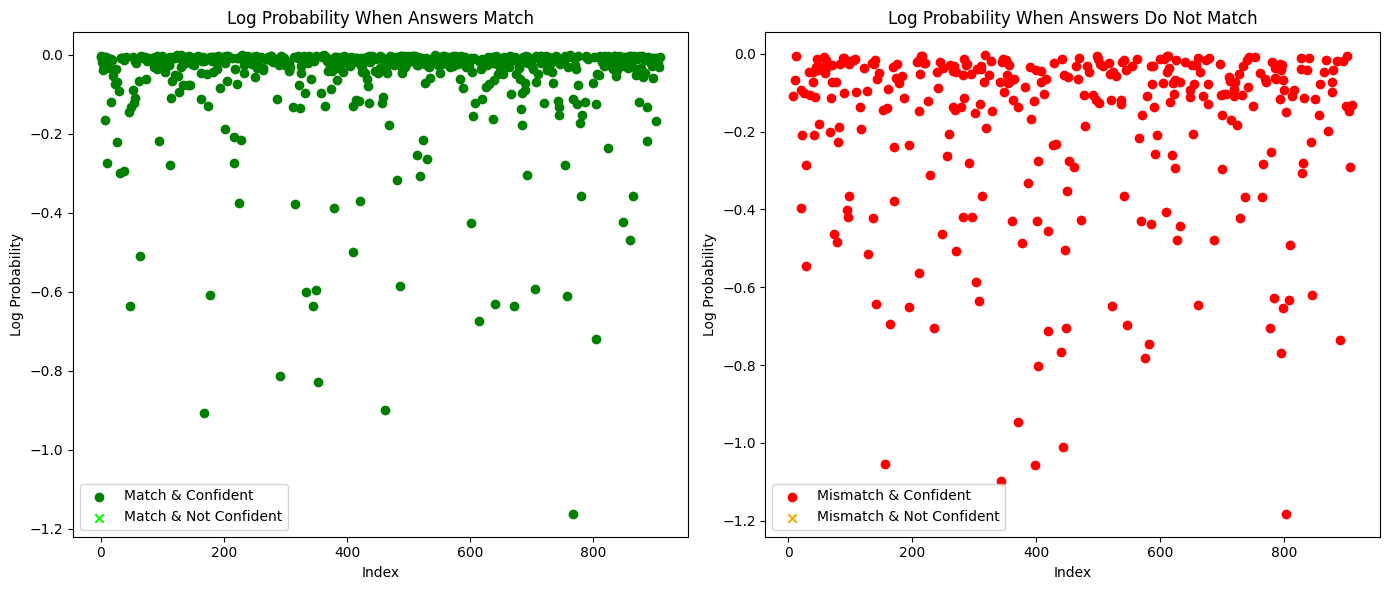

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming new_df is already created with 'correct_answer', 'predicted_answer', 'logprob', and 'llm Confidence' columns

# Filter categories
match_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
match_not_confident = new_df[(new_df['correct_answer'] == new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]
mismatch_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 1)]
mismatch_not_confident = new_df[(new_df['correct_answer'] != new_df['predicted_answer']) & (new_df['llm Confidence'] == 0)]

# Calculate frequencies
freq_match_confident = len(match_confident)
freq_match_not_confident = len(match_not_confident)
freq_mismatch_confident = len(mismatch_confident)
freq_mismatch_not_confident = len(mismatch_not_confident)

# Print frequencies
print("Frequency of Confident Correct Answers:", freq_match_confident)
print("Frequency of Not Confident Correct Answers:", freq_match_not_confident)
print("Frequency of Confident Incorrect Answers:", freq_mismatch_confident)
print("Frequency of Not Confident Incorrect Answers:", freq_mismatch_not_confident)

# Create scatter plot
plt.figure(figsize=(14, 6))

# Plot when answers match
plt.subplot(1, 2, 1)
plt.scatter(match_confident.index, match_confident['logprob'], color='green', marker='o', label='Match & Confident')
plt.scatter(match_not_confident.index, match_not_confident['logprob'], color='lime', marker='x', label='Match & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Match")
plt.legend()

# Plot when answers do not match
plt.subplot(1, 2, 2)
plt.scatter(mismatch_confident.index, mismatch_confident['logprob'], color='red', marker='o', label='Mismatch & Confident')
plt.scatter(mismatch_not_confident.index, mismatch_not_confident['logprob'], color='orange', marker='x', label='Mismatch & Not Confident')
plt.xlabel("Index")
plt.ylabel("Log Probability")
plt.title("Log Probability When Answers Do Not Match")
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


##### Observations

As seen in the results above, LLMs, specifically GPT3.5, are not a reliable source to assess the confidence in its own answer. 

The LLM only categorized five answers as not confident, and claimed high confidence in over 98% of the incorrect answers.

This points us to leverage alternative directions to such as Logprobs to assess a confidence of a model, and flag potentially incorrect responses